In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


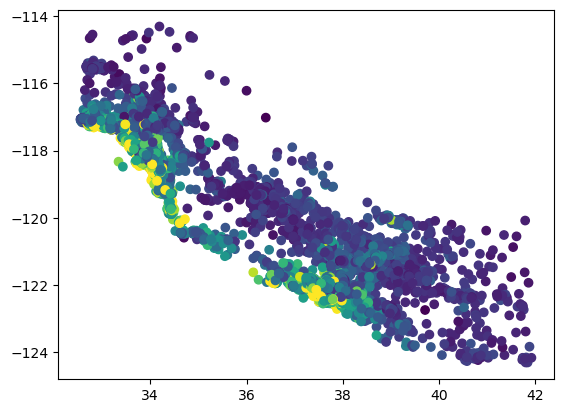

In [4]:
data["meanex"] = pd.cut(data["median_income"], bins=[0,1.5,3.0,4.5,6.0, np.infty], labels=[1,2,3,4,5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_idx, test_idx in split.split(data, data["meanex"]):
    stratified_testData = data.loc[test_idx]
    stratified_trainData = data.loc[train_idx]
# fig, axes = plt.subplots(1,2, figsize=(12,8))
# axes[0].hist(stratified_testData['meanex'])
# axes[1].hist(stratified_trainData['meanex'])

cptest = stratified_trainData.copy()
plt.scatter(cptest["latitude"], cptest["longitude"], cmap="viridis", c = cptest["median_house_value"])

In [5]:
# cptest.drop('meanex', axis = 1, inplace = True)
# cptest.drop('ocean_proximity', axis = 1, inplace=True)

In [6]:
corr_matrix = (cptest.iloc[:, :-2]).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924673,-0.113569,0.052591,0.080166,0.109755,0.065387,-0.022082,-0.052345
latitude,-0.924673,1.000000,0.012366,-0.043967,-0.077201,-0.118356,-0.081548,-0.073493,-0.137864
housing_median_age,-0.113569,0.012366,1.000000,-0.362810,-0.322190,-0.296377,-0.302394,-0.112490,0.116305
total_rooms,0.052591,-0.043967,-0.362810,1.000000,0.929288,0.853244,0.917442,0.200391,0.136801
total_bedrooms,0.080166,-0.077201,-0.322190,0.929288,1.000000,0.873909,0.979684,-0.009279,0.049523
population,0.109755,-0.118356,-0.296377,0.853244,0.873909,1.000000,0.902632,0.002690,-0.024592
households,0.065387,-0.081548,-0.302394,0.917442,0.979684,0.902632,1.000000,0.011088,0.066788
median_income,-0.022082,-0.073493,-0.112490,0.200391,-0.009279,0.002690,0.011088,1.000000,0.687873
median_house_value,-0.052345,-0.137864,0.116305,0.136801,0.049523,-0.024592,0.066788,0.687873,1.000000


In [7]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

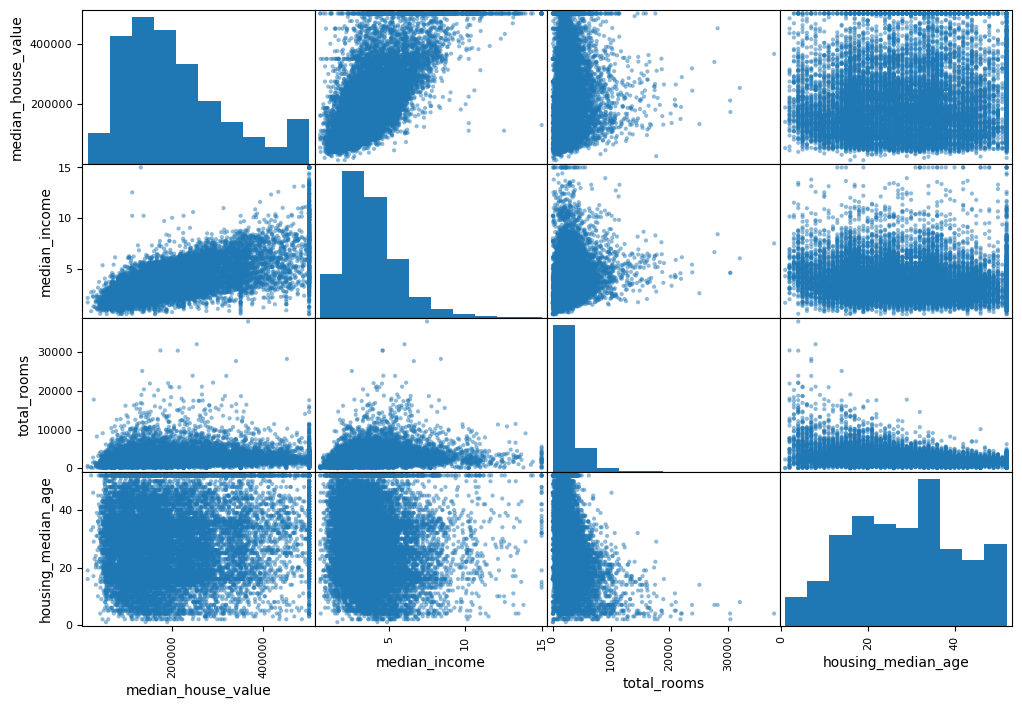

In [8]:
scatter_matrix(cptest[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12,8))

In [8]:
nolevel = stratified_trainData.copy()

In [9]:
nolevel = stratified_trainData.drop(columns=["median_house_value", "meanex", "ocean_proximity"], axis=1)
level = stratified_trainData["median_house_value"]

In [10]:
type(level)

pandas.core.series.Series

In [11]:
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer

indicator = SimpleImputer(strategy="mean")
x = indicator.fit_transform(nolevel)

# indicator = MissingIndicator()
# x = indicator.fit_transform(nolevel)
# x.shape

In [12]:
y = pd.DataFrame(x, columns=nolevel.columns, index=nolevel.index)
# y.iloc[]

In [13]:
nolevel

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8577,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316
5960,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844
4753,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130
15423,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214
9788,-120.51,35.91,39.0,768.0,162.0,264.0,118.0,5.3245
...,...,...,...,...,...,...,...,...
13602,-117.25,34.15,30.0,1770.0,380.0,990.0,348.0,3.3000
14693,-117.11,32.79,16.0,1791.0,518.0,1006.0,491.0,3.5179
15591,-116.34,33.36,24.0,2746.0,514.0,731.0,295.0,3.3214
5676,-118.29,33.71,36.0,3135.0,746.0,1815.0,697.0,3.7596


In [14]:
nolevel.iloc[290]

longitude             -117.9400
latitude                33.8200
housing_median_age      24.0000
total_rooms           4735.0000
total_bedrooms         955.0000
population            2600.0000
households             868.0000
median_income            5.0764
Name: 11191, dtype: float64

In [15]:
nan_indices = nolevel["total_bedrooms"][nolevel.isna().any(axis=1)].index.tolist()
print(nan_indices)

[290, 20267, 9814, 6962, 18177, 13015, 4591, 9620, 738, 16025, 6068, 6253, 14173, 696, 14970, 4667, 4043, 11741, 20268, 4496, 13336, 9571, 13925, 8337, 341, 20046, 16105, 19391, 19332, 9942, 13933, 10915, 17923, 5678, 10236, 15137, 18332, 4629, 4691, 19402, 13656, 1493, 5222, 5216, 19932, 4744, 11351, 5723, 2334, 5990, 6241, 7113, 7228, 14386, 16038, 1456, 16757, 19252, 10033, 19060, 1606, 3482, 17973, 16104, 3778, 12809, 14930, 7654, 2826, 17928, 2608, 19150, 6298, 7191, 18346, 9970, 16330, 20484, 2578, 6590, 15607, 17840, 10385, 13069, 15890, 9877, 4738, 13706, 7330, 20460, 1350, 11512, 538, 4447, 4852, 2351, 7097, 6421, 16880, 7547, 6814, 6220, 19766, 4743, 4279, 1097, 2412, 5751, 7168, 15397, 19122, 5654, 6541, 10389, 7763, 19607, 15118, 3024, 14986, 5236, 2301, 17202, 3376, 14015, 15975, 18914, 4186, 7668, 17639, 20125, 19818, 17198, 9622, 19638, 16879, 5665, 18466, 8383, 10761, 7316]


In [16]:
y["total_bedrooms"][y.isna().any(axis=1)].index.tolist()

[]

In [17]:
from sklearn.impute import MissingIndicator
import pandas as pd
import numpy as np

# Example dataset
df = pd.DataFrame({
    "A": [1, 2, np.nan, 4],
    "B": [5, np.nan, 7, 8],
    "C": [9, 10, 11, np.nan]
})

indicator = MissingIndicator()
mask = indicator.fit_transform(df)

# Convert mask to DataFrame with same index and selected cols
mask_df = pd.DataFrame(mask, 
                       columns=indicator.features_, 
                       index=df.index)

print(mask_df)


       0      1      2
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True


In [18]:
df

,A,B,C
0,1.0,5.0,9.0
1,2.0,NaN,10.0
2,NaN,7.0,11.0
3,4.0,8.0,NaN


In [19]:
nolevel
indicator = MissingIndicator()
mask = indicator.fit_transform(nolevel)

# Convert mask to DataFrame with same index and selected cols
mask_df = pd.DataFrame(mask, 
                       columns=indicator.features_, 
                       index=nolevel.index)

print(mask_df.loc[290])


4    True
Name: 290, dtype: bool


In [20]:
from sklearn.preprocessing import OrdinalEncoder

cat_data = stratified_testData[["ocean_proximity"]]
estimator = OrdinalEncoder()
encoded_Data = estimator.fit_transform(cat_data)
estimator.categories_
encoded_Data

array([[0.],
       [4.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [21]:
from sklearn.preprocessing import OneHotEncoder

estimator = OneHotEncoder()
Oneencoded_Data = estimator.fit_transform(cat_data)
Oneencoded_Data
Oneencoded_Data.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
from sklearn.preprocessing import MinMaxScaler

estimator = MinMaxScaler()
ScaleinBy_Minmax = estimator.fit_transform(nolevel)

pd.DataFrame(ScaleinBy_Minmax)

,0,1,2,3,4,5,6,7
0,0.589590,0.143010,0.588235,0.037489,0.058146,0.018891,0.063428,0.464249
1,0.647648,0.166489,0.549020,0.070259,0.079539,0.041509,0.085406,0.309272
2,0.597598,0.159018,0.588235,0.028578,0.045529,0.026682,0.045691,0.166418
3,0.704705,0.069370,0.235294,0.083230,0.132200,0.046862,0.120879,0.160101
4,0.379379,0.358591,0.745098,0.020089,0.029256,0.007315,0.022364,0.332726
...,...,...,...,...,...,...,...,...
14443,0.705706,0.170758,0.568627,0.046505,0.069117,0.027663,0.066705,0.193108
14444,0.719720,0.025614,0.294118,0.047059,0.094350,0.028112,0.094274,0.208135
14445,0.796797,0.086446,0.450980,0.072236,0.093619,0.020404,0.056487,0.194584
14446,0.601602,0.123799,0.686275,0.082492,0.136039,0.050786,0.133989,0.224804


In [25]:
from sklearn.preprocessing import StandardScaler

estimator = StandardScaler()
scallingBu_Standard = estimator.fit_transform(nolevel)
pd.DataFrame(scallingBu_Standard, columns=nolevel.columns, index=nolevel.index)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8577,0.580737,-0.817622,0.179523,-0.557719,-0.516567,-0.660689,-0.436930,1.773271
5960,0.870283,-0.714454,0.020470,0.027011,-0.233167,0.063183,-0.133760,0.586744
4753,0.620674,-0.747280,0.179523,-0.716720,-0.683700,-0.411325,-0.681593,-0.506961
15423,1.154837,-1.141197,-1.251947,0.258457,0.464432,0.234509,0.355567,-0.555326
9788,-0.467620,0.129653,0.815731,-0.868195,-0.899277,-1.031146,-1.003379,0.766318
...,...,...,...,...,...,...,...,...
13602,1.159830,-0.695696,0.099997,-0.396836,-0.371233,-0.379931,-0.391720,-0.302624
14693,1.229720,-1.333466,-1.013369,-0.386957,-0.036967,-0.365579,-0.011428,-0.187572
15591,1.614118,-1.066165,-0.377160,0.062293,-0.046656,-0.612251,-0.532668,-0.291324
5676,0.640643,-0.902033,0.577153,0.245285,0.515299,0.360088,0.536406,-0.059954


In [27]:
# plt.plot(nolevel["longitude"], nolevel["latitude"])
